In [1]:
import pyspark as ps
spark = (ps.sql.SparkSession.builder 
        .master("local[2]") 
        .appName("sparkSQL star rating") 
        .getOrCreate()
        )
sc = spark.sparkContext

In [2]:
df = spark.read.csv('../amazon_reviews_us_Camera_v1_00.tsv.gz', sep='\t', header=True, inferSchema=True)
df.printSchema()

root
 |-- marketplace: string (nullable = true)
 |-- customer_id: integer (nullable = true)
 |-- review_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_parent: integer (nullable = true)
 |-- product_title: string (nullable = true)
 |-- product_category: string (nullable = true)
 |-- star_rating: integer (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- total_votes: integer (nullable = true)
 |-- vine: string (nullable = true)
 |-- verified_purchase: string (nullable = true)
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- review_date: timestamp (nullable = true)



In [3]:
from matplotlib import pyplot as plt
import numpy as np
from pyspark.sql.functions import col, avg

def plot_stars_dist(df):
    ratings=df.groupby('star_rating').count().dropna()
#     mean_rating=df.select(avg('star_rating'))
#     mean_rating=list(zip(*mean_rating.collect()))[0][0]
#     count each rating and ignore invalid one
    ra=ratings.select('star_rating','count').collect()
#     select rating and count columns to export as arrarys
    ra=list(zip(*ra)) 
    plt.bar(ra[0],ra[1])
#     plt.axvline(x=mean_rating)
#     plot it

In [4]:
ratings=df.select('star_rating').limit(1000).cache()

--- 1.3807170391082764 seconds ---


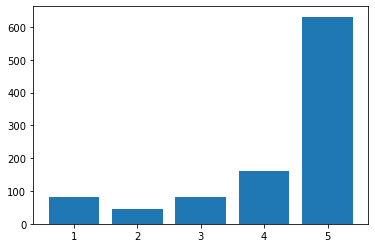

In [5]:
import time
start_time = time.time()
plot_stars_dist(ratings)
print("--- %s seconds ---" % (time.time() - start_time))

In [6]:
ratings_all=df.select('star_rating')

--- 18.34411334991455 seconds ---


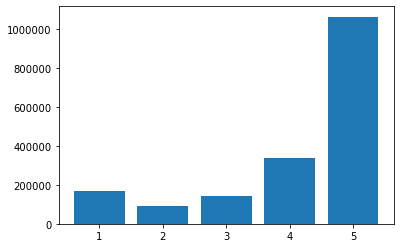

In [7]:
start_time = time.time()
plot_stars_dist(ratings_all)
print("--- %s seconds ---" % (time.time() - start_time))

In [8]:
ratings_all=df.select('star_rating').cache()

--- 18.363274812698364 seconds ---


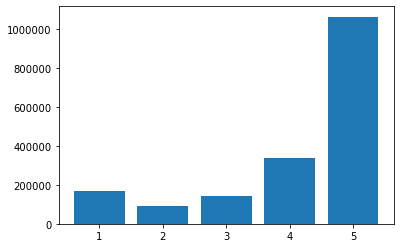

In [9]:
start_time = time.time()
plot_stars_dist(ratings_all)
print("--- %s seconds ---" % (time.time() - start_time))